Data Preprocessing

In [1]:
!pip install minisom
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('CC GENERAL.csv')

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Normalize the data
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df.drop(['CUST_ID'], axis=1))


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=b72faa06b12e84a422cb81b741ab81f5dd00dbd8c2b864296089526e71ed4cfa
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


<ipython-input-1-fed0e4ea20dc>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Determine the optimal number of clusters for k-mean using elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

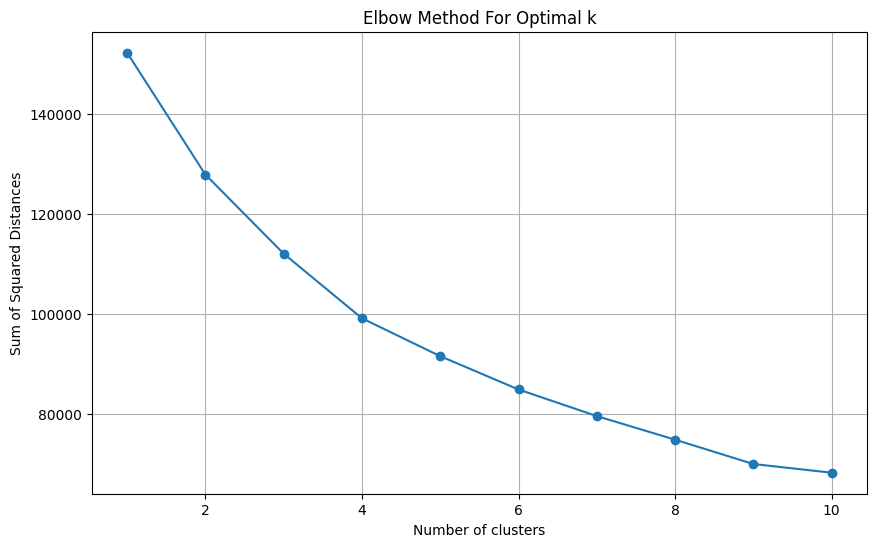

Elbow Curve: 2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'df_normalized' is the normalized data
# Let's determine the optimal number of clusters using the Elbow Method

# List to store the sum of squared distances for each k
ssd = []

# Try different numbers of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    ssd.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()

# Calculate the second derivative
second_derivative = np.diff(ssd, n=2)

# The elbow point is where the second derivative is maximum
elbow_point = np.argmax(second_derivative) + 2  # Adding 2 because of indexing differences
print('Elbow Curve: ' + str(elbow_point))

Prepare the field

In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Reducing the dimensionality in order to visualize the distribution
# Apply PCA
principal_components = PCA(n_components=2).fit_transform(df_normalized)
principal_components_3d = PCA(n_components=3).fit_transform(df_normalized)
# Apply t-SNE
tsne_results = TSNE(n_components=2, random_state=42).fit_transform(df_normalized)
tsne_results_3d = TSNE(n_components=3, random_state=42).fit_transform(df_normalized)

def plot_clusters(clusters, dimensions, name):
  plt.figure(figsize=(8, 6))
  plt.scatter(dimensions[:, 0], dimensions[:, 1], c=clusters, cmap='viridis', marker='o')
  plt.title('Visualization of ' + name)
  plt.xlabel('Dimension 1')
  plt.ylabel('Dimension 2')
  plt.colorbar()
  plt.show()

def plot_clusters_3d(clusters, dimensions, name):
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(dimensions[:, 0], dimensions[:, 1], dimensions[:, 2], c=clusters, cmap='viridis', marker='o')
  ax.set_title('3D Visualization of ' + name)
  ax.set_xlabel('Dimension 1')
  ax.set_ylabel('Dimension 2')
  ax.set_zlabel('Dimension 3')
  plt.show()

def plot_all(clusters, model_name):
  plot_clusters(clusters, principal_components, model_name + ' Clusters with PCA')
  plot_clusters_3d(clusters, principal_components_3d, model_name + ' Clusters with PCA')
  plot_clusters(clusters, tsne_results, model_name + ' Clusters with t-SNE')
  plot_clusters_3d(clusters, tsne_results_3d, model_name + ' Clusters with t-SNE')

K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


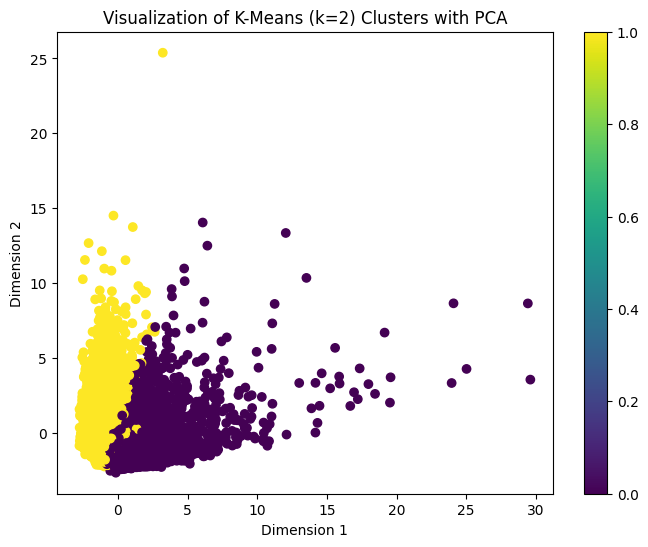

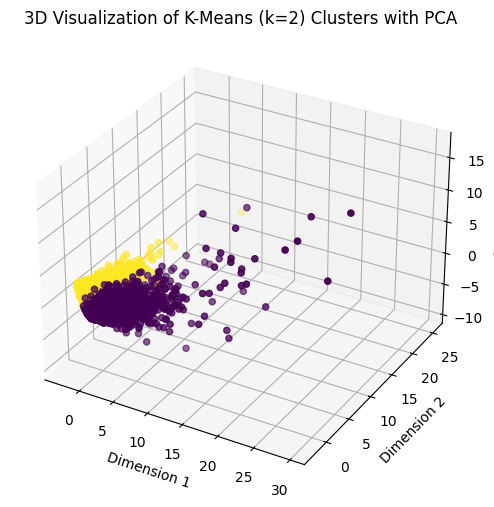

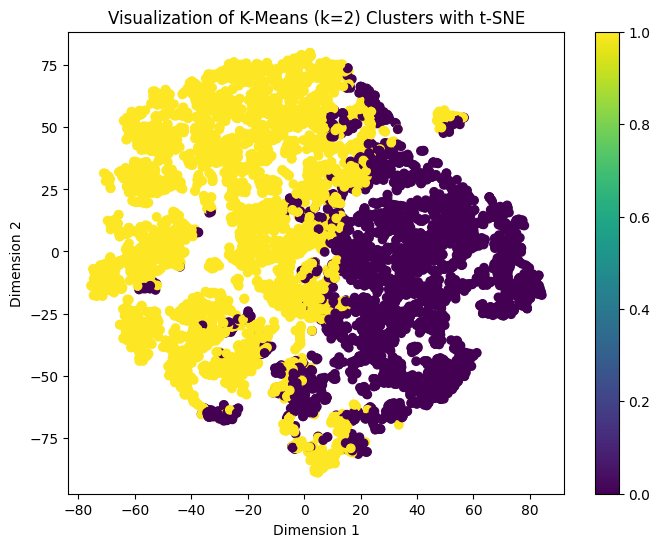

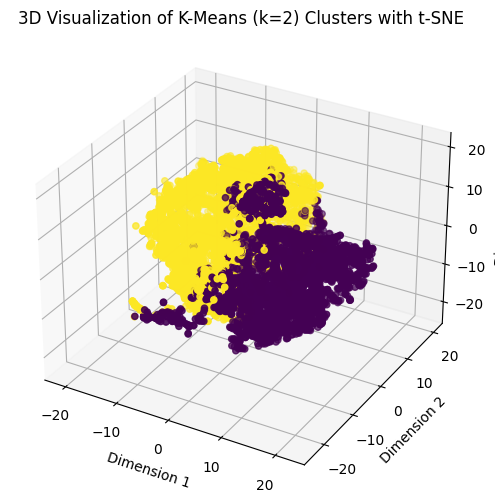

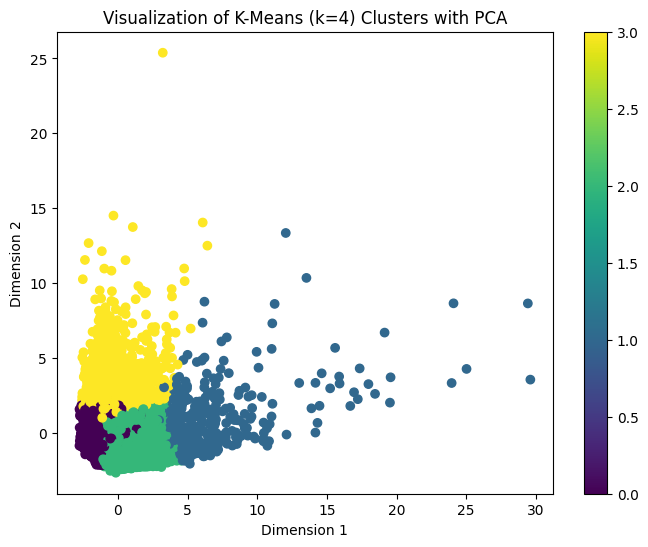

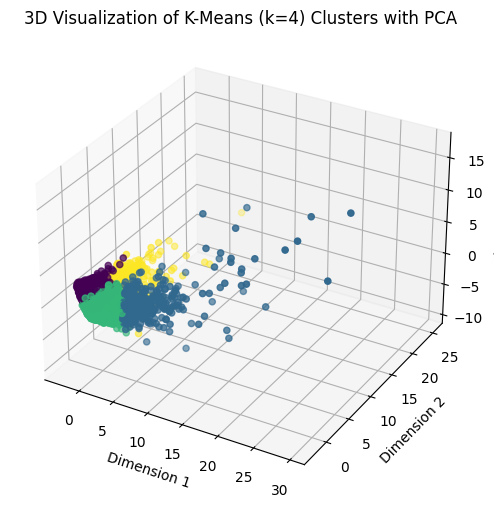

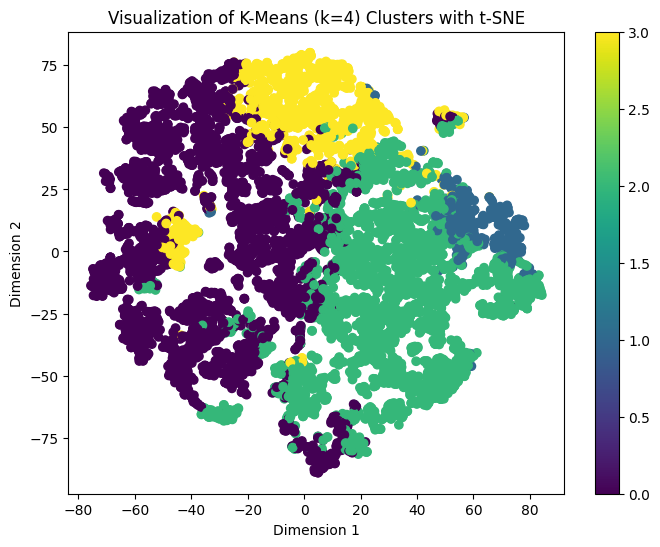

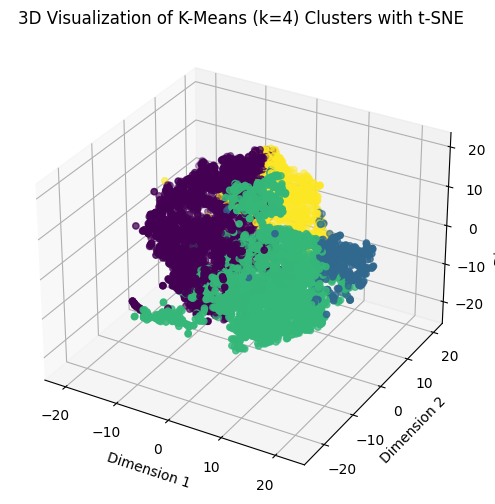

In [4]:
from sklearn.cluster import KMeans

# Apply K-Means Clustering

kmeans_clusters_2 = KMeans(n_clusters=2).fit_predict(df_normalized)
kmeans_clusters_4 = KMeans(n_clusters=4).fit_predict(df_normalized)
plot_all(kmeans_clusters_2, 'K-Means (k=2)')
plot_all(kmeans_clusters_4, 'K-Means (k=4)')


Calculate Optimal DBSCAN eps

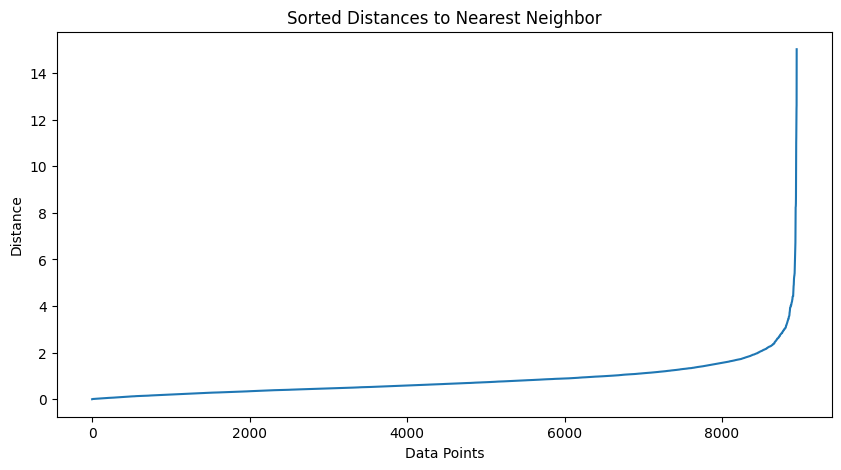

In [5]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_normalized)
distances, indices = neighbors_fit.kneighbors(df_normalized)

# Sort and plot distances
sorted_distances = np.sort(distances[:, 1], axis=0)
plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.title('Sorted Distances to Nearest Neighbor')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


DBSCAN Clustering

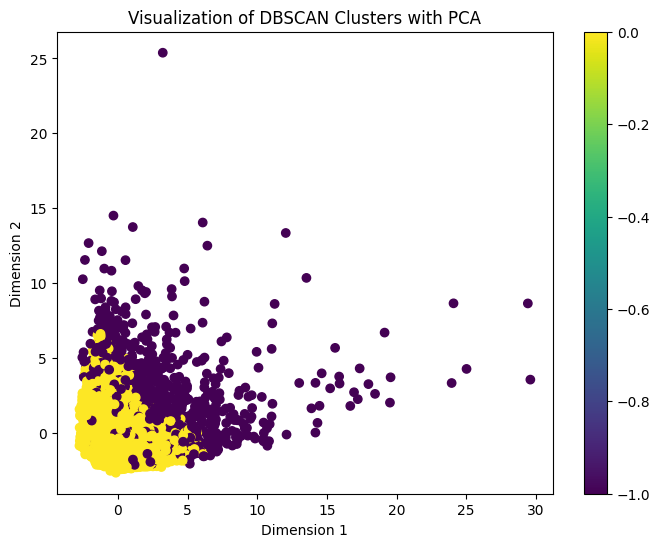

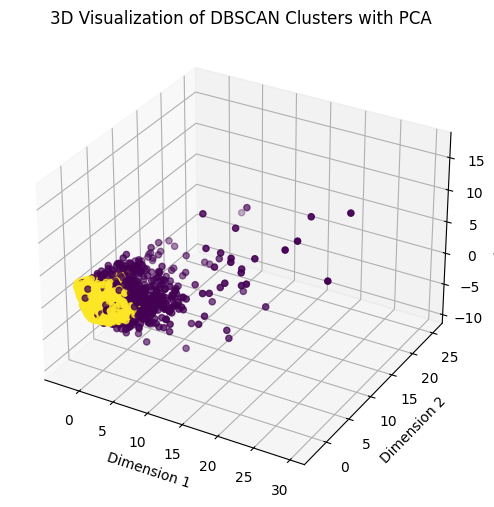

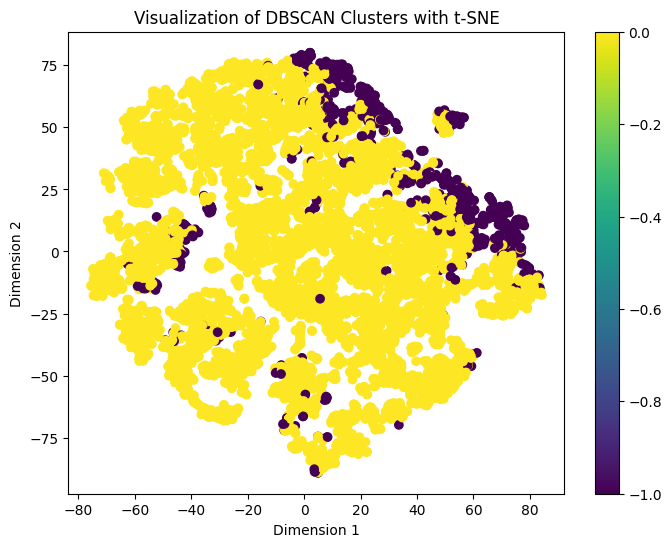

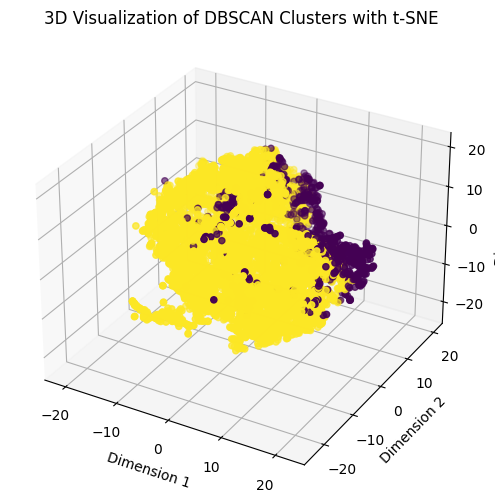

In [6]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN Clustering
dbscan_clusters = DBSCAN(eps=2, min_samples=18).fit_predict(df_normalized)
plot_all(dbscan_clusters, 'DBSCAN')


Self-Organizing Maps (SOM)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


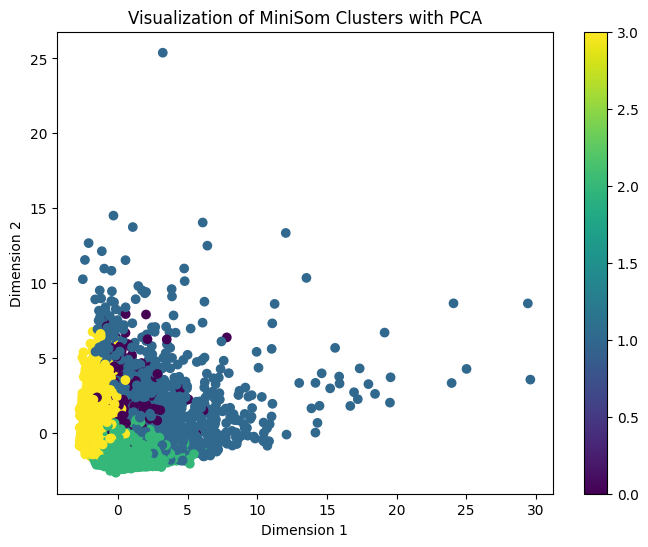

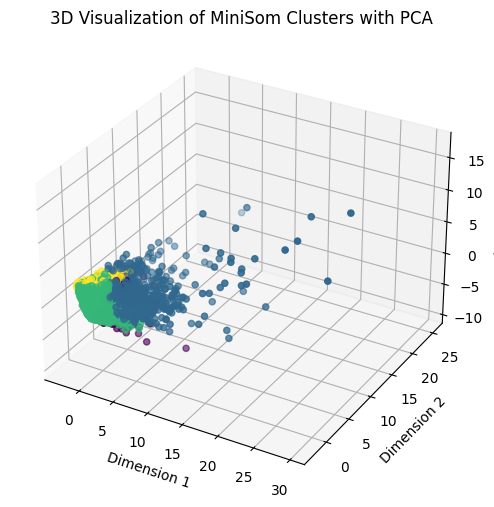

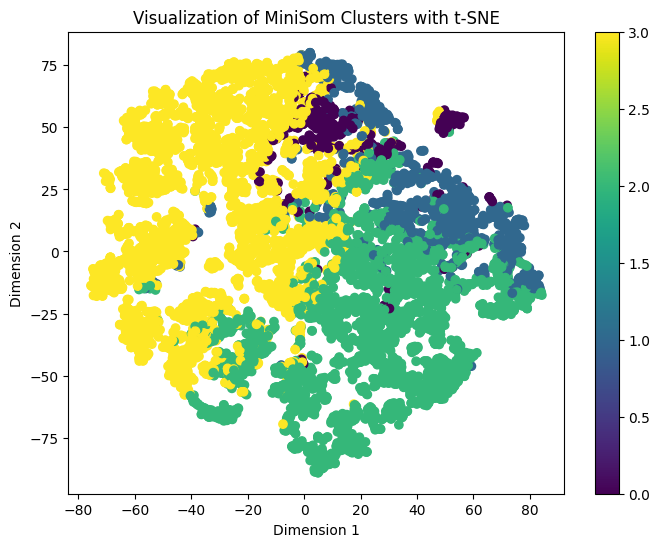

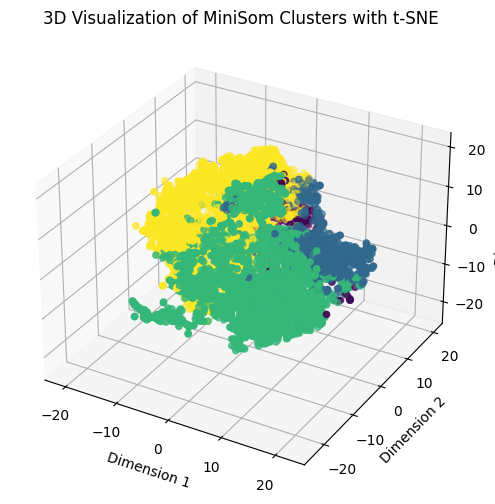

In [7]:
from minisom import MiniSom

# Dimensions of the SOM grid
grid_x, grid_y = 10, 10  # Update these values to match your SOM's dimensions

# Define SOM parameters and initialize
som = MiniSom(x=grid_x, y=grid_y, input_len=df_normalized.shape[1], sigma=max(grid_x, grid_y) / 2, learning_rate=0.5)

# Train the SOM
som.train_random(df_normalized, 100)  # Number of iterations

# Assign each data point to its closest neuron (winner neuron)
win_map = som.win_map(df_normalized)

# Now, win_map is a dictionary where keys are coordinates of neurons and values are lists of data points (indices) assigned to those neurons

# Create a matrix where each row is a neuron weight vector
neuron_weights = np.array(som.get_weights()).reshape(-1, df_normalized.shape[1])

# Apply K-Means on the neurons for clearer cluster extraction
kmeans = KMeans(n_clusters=4)
neuron_clusters = kmeans.fit_predict(neuron_weights)

# Flatten the 2D grid coordinates into a 1D index
def grid_to_1d_index(x, y, grid_width):
    return x * grid_width + y

# Update the data point to cluster mapping
minisom_clusters = [neuron_clusters[grid_to_1d_index(*som.winner(x), grid_y)] for x in df_normalized]

plot_all(minisom_clusters, 'MiniSom')

Hierarchical Clustering

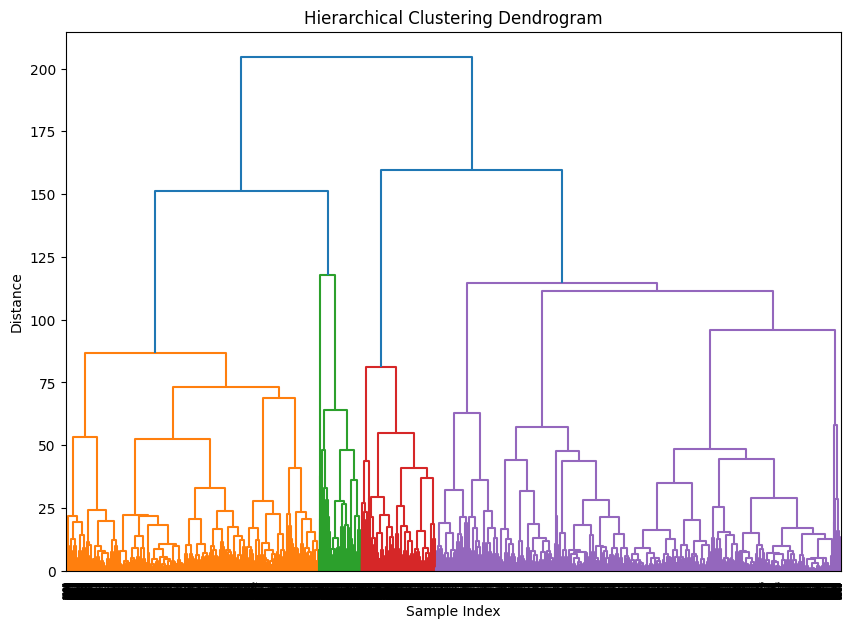

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform Hierarchical Clustering
Z = linkage(df_normalized, method='ward')

# Plotting the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



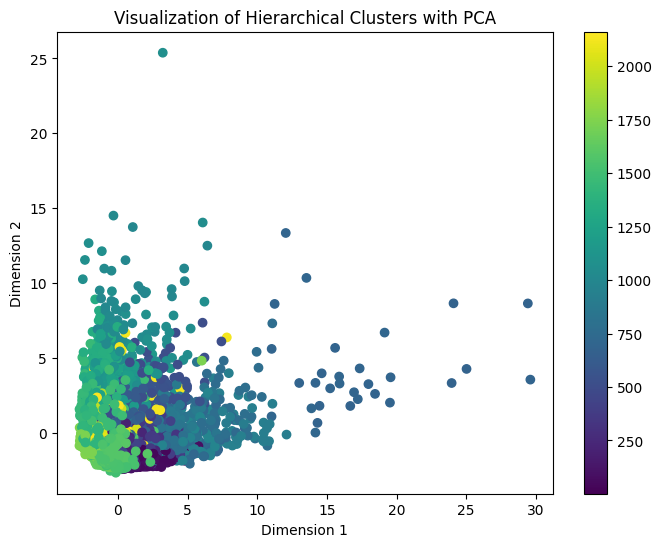

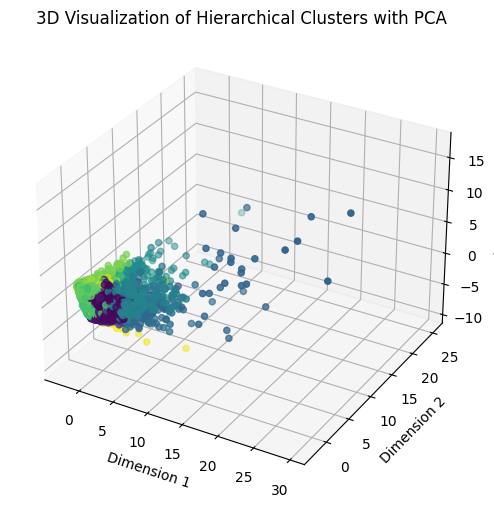

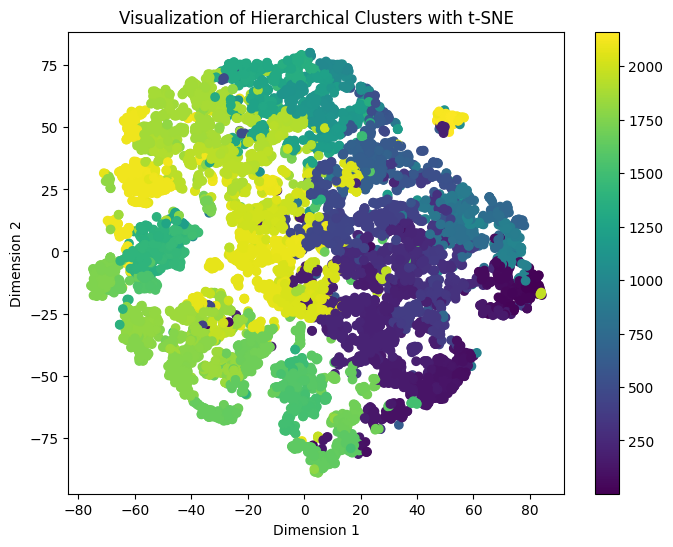

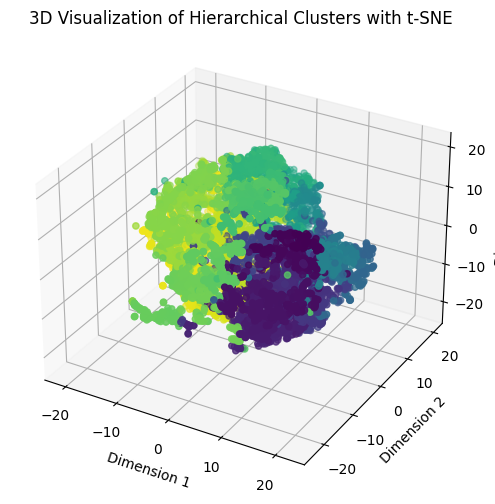

In [9]:
# Forming clusters from the dendrogram
hierarchical_clusters = fcluster(Z, 2, criterion='distance')
plot_all(hierarchical_clusters, 'Hierarchical')

Metrify

In [10]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def print_metrics(clusters, name):
  silhouette = silhouette_score(df_normalized, clusters)
  calinski = calinski_harabasz_score(df_normalized, clusters)
  davies = davies_bouldin_score(df_normalized, clusters)
  # Output the results
  print()
  print(name + " Clustering Evaluation:")
  print("Silhouette Score:", silhouette)
  print("Calinski-Harabasz Index:", calinski)
  print("Davies-Bouldin Index:", davies)


print_metrics(kmeans_clusters_2, "K-Means (k=2)")
print_metrics(kmeans_clusters_4, "K-Means (k=4)")
print_metrics(dbscan_clusters, "DBSCAN")
print_metrics(minisom_clusters, "MiniSom")
print_metrics(hierarchical_clusters, "Hierarchical")


K-Means (k=2) Clustering Evaluation:
Silhouette Score: 0.20985855736893663
Calinski-Harabasz Index: 1706.1527584869987
Davies-Bouldin Index: 1.9120981183685364

K-Means (k=4) Clustering Evaluation:
Silhouette Score: 0.1972190139511997
Calinski-Harabasz Index: 1597.50217218214
Davies-Bouldin Index: 1.5763365368117292

DBSCAN Clustering Evaluation:
Silhouette Score: 0.44346846471616846
Calinski-Harabasz Index: 1028.5552289827194
Davies-Bouldin Index: 2.182750693945843

MiniSom Clustering Evaluation:
Silhouette Score: 0.16921184162487493
Calinski-Harabasz Index: 1095.1795162419853
Davies-Bouldin Index: 1.9495052366816936

Hierarchical Clustering Evaluation:
Silhouette Score: 0.15439220793283054
Calinski-Harabasz Index: 139.86625156888692
Davies-Bouldin Index: 0.8659337530776073


Summarize

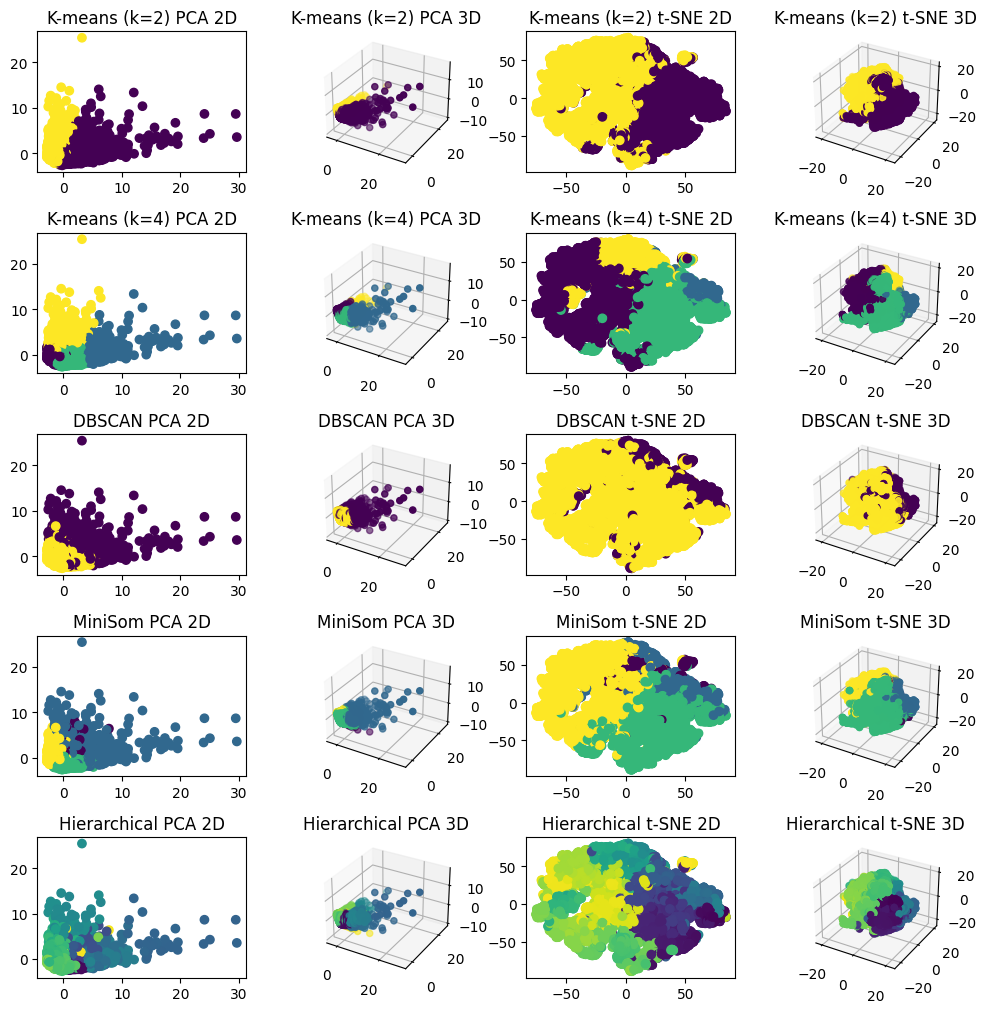

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# Number of clustering algorithms
algorithms = ["WILL BE SKIPPED", "K-means (k=2)", "K-means (k=4)", "DBSCAN", "MiniSom", "Hierarchical"]

# Create a figure with subplots
fig = plt.figure(figsize=(10, 12))

# Plotting for each clustering algorithm and each dimensionality reduction technique
for i, clusters in enumerate([kmeans_clusters_2, kmeans_clusters_4, dbscan_clusters, minisom_clusters, hierarchical_clusters], start=1):
    # PCA 2D
    ax = fig.add_subplot(len(algorithms), 4, (i - 1) * 4 + 1)
    ax.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o')
    ax.set_title(f'{algorithms[i]} PCA 2D')

    # PCA 3D
    ax = fig.add_subplot(len(algorithms), 4, (i - 1) * 4 + 2, projection='3d')
    ax.scatter(principal_components_3d[:, 0], principal_components_3d[:, 1], principal_components_3d[:, 2], c=clusters, cmap='viridis', marker='o')
    ax.set_title(f'{algorithms[i]} PCA 3D')

    # t-SNE 2D
    ax = fig.add_subplot(len(algorithms), 4, (i - 1) * 4 + 3)
    ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='viridis', marker='o')
    ax.set_title(f'{algorithms[i]} t-SNE 2D')

    # t-SNE 3D
    ax = fig.add_subplot(len(algorithms), 4, (i - 1) * 4 + 4, projection='3d')
    ax.scatter(tsne_results_3d[:, 0], tsne_results_3d[:, 1], tsne_results_3d[:, 2], c=clusters, cmap='viridis', marker='o')
    ax.set_title(f'{algorithms[i]} t-SNE 3D')

# Adjust layout
plt.tight_layout()
plt.show()
